<a href="https://colab.research.google.com/github/Amaljayaranga/Solution/blob/master/Solution_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torchvision
from PIL import Image
import torchvision.transforms as T
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import json

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def get_prediction(img_path, threshold):
    img = Image.open(img_path)
    transform = T.Compose([T.ToTensor()])
    img = transform(img)
    pred = model([img])
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
    pred_boxes = pred_boxes[:pred_t + 1]
    pred_class = pred_class[:pred_t + 1]
    return pred_boxes, pred_class

def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
  boxes, pred_cls = get_prediction(img_path, threshold)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th)
    cv2.putText(img,pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)
  plt.figure(figsize=(20,30))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

object_detection_api('00000.jpg', threshold=0.9)

In [0]:
!unzip 'People.zip'

In [16]:
import torchvision
from PIL import Image
import torchvision.transforms as T
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import json

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

def get_prediction(img_path, threshold):
    img = Image.open(img_path)
    transform = T.Compose([T.ToTensor()])
    img = transform(img)
    pred = model([img])
    pred_class = [COCO_INSTANCE_CATEGORY_NAMES[i] for i in list(pred[0]['labels'].numpy())]
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())]
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1]
    pred_boxes = pred_boxes[:pred_t + 1]
    pred_class = pred_class[:pred_t + 1]
    return pred_boxes, pred_class

def object_detection_api(img_path, threshold=0.5, rect_th=3, text_size=3, text_th=3):
  boxes, pred_cls = get_prediction(img_path, threshold)
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  for i in range(len(boxes)):
    cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=rect_th)
    cv2.putText(img,pred_cls[i], boxes[i][0], cv2.FONT_HERSHEY_SIMPLEX, text_size, (0,255,0),thickness=text_th)
  plt.figure(figsize=(20,30))
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.show()

#object_detection_api('./bird.jpg', threshold=0.5)
#boxes, pred_cls = get_prediction('./2.jpg', threshold=0.6)
#print(pred_cls)
#print(boxes)

img_data = {}
img_data['imgs'] = []
path = './People/'

images = os.listdir(path)
for image in images:
    boxes, pred_cls = get_prediction(path+image, threshold=0.9)
    np_boxes = np.array(boxes)
    np_classes = np.array(pred_cls)
    img_object = []

    for class_, box_ in zip(np_classes, np_boxes):
      object = {}
      object["class"] = class_
      object["x"] = int(box_[0][0])
      object["y"] = int(box_[0][1])
      object["width"] = int(box_[1][0] - box_[0][0])
      object["height"] = int(box_[1][1] - box_[0][1])
      img_object.append(object)

    single_image = {}
    single_image["index"] = image.split('.')[0]
    single_image["objects"] = img_object
    img_data['imgs'].append(single_image)

print(img_data)
with open('all-people-json.txt', 'w') as outfile:
    json.dump(img_data, outfile)

{'imgs': [{'index': '00017', 'objects': [{'class': 'car', 'x': 652, 'y': 159, 'width': 35, 'height': 21}, {'class': 'person', 'x': 333, 'y': 2, 'width': 501, 'height': 477}, {'class': 'person', 'x': 52, 'y': 27, 'width': 545, 'height': 452}]}, {'index': '00022', 'objects': [{'class': 'car', 'x': 626, 'y': 145, 'width': 26, 'height': 21}, {'class': 'person', 'x': 261, 'y': 10, 'width': 590, 'height': 469}, {'class': 'person', 'x': 47, 'y': 17, 'width': 606, 'height': 462}, {'class': 'person', 'x': 366, 'y': 101, 'width': 17, 'height': 28}]}, {'index': '00004', 'objects': [{'class': 'person', 'x': 353, 'y': 6, 'width': 393, 'height': 473}, {'class': 'person', 'x': 8, 'y': 88, 'width': 406, 'height': 384}, {'class': 'person', 'x': 711, 'y': 15, 'width': 137, 'height': 461}, {'class': 'car', 'x': 681, 'y': 165, 'width': 55, 'height': 30}, {'class': 'car', 'x': 621, 'y': 161, 'width': 52, 'height': 29}, {'class': 'person', 'x': 140, 'y': 51, 'width': 26, 'height': 26}]}, {'index': '00002', 

In [0]:
import cv2
import os
import numpy as np


path = './People/'
memmaps = []


for filename in os.listdir(path):
    memmap_filename = filename.split('.')[0]+'.mmap'
    memmap_filename = path+'memmap/'+memmap_filename
    os.makedirs(os.path.dirname(memmap_filename), exist_ok=True)

    im = cv2.imread(path+filename)
    if not (im is None):
      dtype = im.dtype
      shape = im.shape
      fp = np.memmap(memmap_filename, dtype=dtype, mode='w+', shape=shape)
      fp[:] = im[:]
      memmaps.append(fp)

complete_memmap = path + 'memmap/'+'all-people.mmap'

os.makedirs(os.path.dirname(path + 'memmap'), exist_ok=True)
complete_shape = (len(memmaps), shape[0], shape[1], shape[2])
    # print("Complete shape ",complete_shape) #(82, 480, 854, 3)
    # complete_shape=(82,480,854,3)
    # print(complete_shape)
fpc = np.memmap(complete_memmap, dtype=dtype, mode='w+', shape=complete_shape)
fpc[:] = memmaps[:]

{'class': 'person', 'x': 333, 'y': 2, 'width': 501, 'height': 477}
{'class': 'person', 'x': 52, 'y': 27, 'width': 545, 'height': 452}
{'class': 'person', 'x': 261, 'y': 10, 'width': 590, 'height': 469}
{'class': 'person', 'x': 47, 'y': 17, 'width': 606, 'height': 462}
{'class': 'person', 'x': 366, 'y': 101, 'width': 17, 'height': 28}
{'class': 'person', 'x': 353, 'y': 6, 'width': 393, 'height': 473}
{'class': 'person', 'x': 8, 'y': 88, 'width': 406, 'height': 384}
{'class': 'person', 'x': 711, 'y': 15, 'width': 137, 'height': 461}
{'class': 'person', 'x': 140, 'y': 51, 'width': 26, 'height': 26}
{'class': 'person', 'x': 374, 'y': 18, 'width': 374, 'height': 458}
{'class': 'person', 'x': 43, 'y': 105, 'width': 371, 'height': 371}
{'class': 'person', 'x': 718, 'y': 47, 'width': 132, 'height': 431}
{'class': 'person', 'x': 142, 'y': 3, 'width': 56, 'height': 81}
{'class': 'person', 'x': 371, 'y': 1, 'width': 446, 'height': 474}
{'class': 'person', 'x': 7, 'y': 109, 'width': 421, 'height':

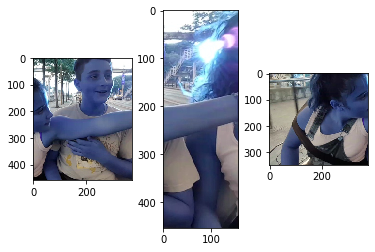

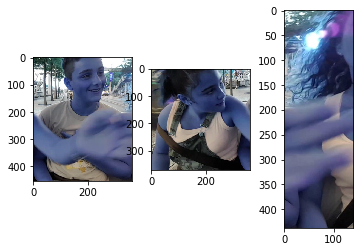

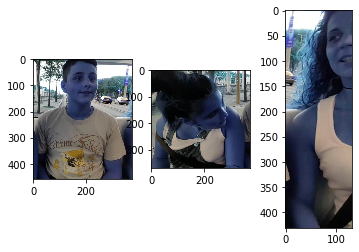

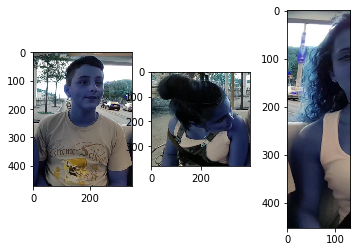

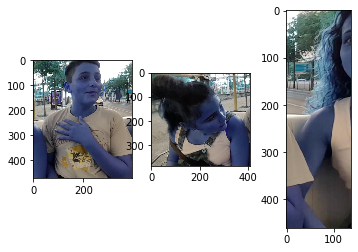

In [30]:
from torch.utils.data import Dataset
import numpy as np
import json
import matplotlib.pyplot as plt

class DavisDataset(Dataset):

    def __init__(self, memmap, json_data, need_classes):

        ##cropping objects from memaps and add to idxes
        self.memmap = memmap
        self.json_data = json_data
        self.idxes = {}
        self.max_no_classes = 0
        self.need_classes = need_classes

        imgs = self.json_data['imgs']
        for img in imgs:
            idx = int(img['index'])
            classes = img['objects']
            classes_ = []
            objects_ = []
            class_objects = []
            for class_idx, class_ in enumerate(classes):
              if class_['class']  in self.need_classes:
                  single_class = class_['class']
                  x = class_['x']
                  y = class_['y']
                  width = class_['width']
                  height = class_['height']

                  if class_idx > self.max_no_classes:
                      self.max_no_classes = class_idx

                  image = self.memmap[idx]
                  crop_img = image[y:y + height, x:x + width]
                  classes_.append(single_class)
                  objects_.append(crop_img)

            class_objects.append(classes_)
            class_objects.append(objects_)
            self.idxes[idx] = class_objects

    def __len__(self):
        return len(self.memmap)

    def __getitem__(self, index):
        classes, images = self.idxes.get(index)
        return classes, images


#loading memmap
folder_path = './'
complete_shape=(59,480,854,3)
complete_memmap = folder_path+'all-people.mmap'
newfp = np.memmap(complete_memmap, dtype='uint8', mode='r', shape=complete_shape)


#loading json
with open('all-people-json.txt') as json_file:
    data_json = json.load(json_file)


def show_objects(images):
  img_np_0 = np.asarray(images[0])
  img_np_1 = np.asarray(images[1])
  img_np_2 = np.asarray(images[2])

  f, axarr = plt.subplots(1, 3)
  axarr[0].imshow(img_np_0, interpolation='nearest')
  axarr[1].imshow(img_np_1, interpolation='nearest')
  axarr[2].imshow(img_np_2, interpolation='nearest')
  plt.show()

need_classes = ['person']
siamese = DavisDataset(newfp, data_json, need_classes)
for i in range(5):
  classes, images  = siamese.__getitem__(i)
  show_objects(images)